In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
inf = pd.read_csv("../data/raw/cam-inflation-2005-2025.csv")
exp = pd.read_csv("../data/raw/export-2015-2025.csv")
fuel = pd.read_csv("../data/raw/fuel-price-2023-2025.csv").sort_values(by="Start_Date")
imp = pd.read_csv("../data/raw/import-2015-2025.csv")
exch = pd.read_csv("../data/raw/khr-usd-exchange-2003-2023.csv") 

## Check Missing Values

In [3]:
print(inf.isna().sum())
print(exp.isna().sum())
print(fuel.isna().sum())
print(imp.isna().sum())
print(exch.isna().sum())

Date                       0
CPI_all_item               0
MoM_Change_CPI_all_item    0
YoY_Change_CPI_all_item    0
Three_Month_Avg_YoY        0
Twelve_Month_Avg_YoY       0
dtype: int64
year                  0
month_num             0
month_abb             0
chapter               0
commodity             0
value_thousand_usd    0
dtype: int64
Start_Date                        0
End_Date                          0
Gasoline_92_Unit_Price            0
Gasoline_92_Unit_Price_Change     1
Gasoil_50ppm_Unit_Price           0
Gasoil_50ppm_Unit_Price_Change    1
Source_Link                       0
dtype: int64
year                  0
month_num             0
month_abb             0
chapter               0
commodity             0
value_thousand_usd    0
dtype: int64
Date                                             0
Purchase                                         0
Sale                                             0
Midpoint                                         0
Exchange_Rate                 

## Check for Duplicate Rows

In [4]:
print(inf.duplicated().sum())
print(exp.duplicated().sum())
print(fuel.duplicated().sum())
print(imp.duplicated().sum())
print(exch.duplicated().sum())

0
0
0
0
0


In [5]:
inf = inf.drop(columns=['MoM_Change_CPI_all_item', 'YoY_Change_CPI_all_item', 'Three_Month_Avg_YoY', 'Twelve_Month_Avg_YoY'])
fuel = fuel.drop(columns=['Gasoline_92_Unit_Price_Change', 'Gasoil_50ppm_Unit_Price_Change'])
exp = exp.drop(columns=["chapter"])
imp = imp.drop(columns=["chapter"])
exch = exch.drop(columns=["Spread_Market_day_X-1_over_OER_day_X_midpoint"])

## Check for Outliers

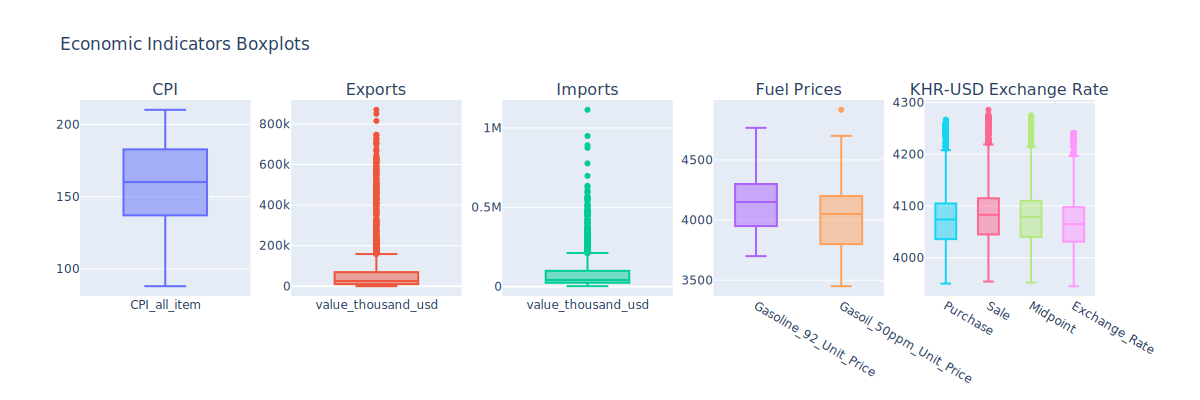

In [7]:
fig = make_subplots(
    rows=1, 
    cols=5, 
    subplot_titles=("CPI", "Exports", "Imports", "Fuel Prices", "KHR-USD Exchange Rate")
)

dfs = [inf, exp, imp, fuel, exch]
names = ['CPI', 'Exports', 'Imports', 'Fuel', 'Exchange']

for i, (df, name) in enumerate(zip(dfs, names)):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if name in ['Exports', 'Imports']:
        numeric_cols = [col for col in numeric_cols if col not in ['year', 'month_num']]
    col_index = i + 1
    for col_name in numeric_cols:
        fig.add_trace(
            go.Box(y=df[col_name], name=col_name, showlegend=False),
            row=1,
            col=col_index
        )

fig.update_layout(height=400, width=1200, title_text="Economic Indicators Boxplots")
fig.show(renderer="svg")

## EDA

In [ ]:
inf['Date'] = pd.to_datetime(inf['Date'], dayfirst=True)
inf.head()

,Date,CPI_all_item,MoM_Change_CPI_all_item,YoY_Change_CPI_all_item,Three_Month_Avg_YoY,Twelve_Month_Avg_YoY
0,2005-01-22,87.98,0.14,5.12,5.28,4.32
1,2005-02-22,88.39,0.47,5.35,5.25,4.71
2,2005-03-22,88.63,0.27,5.09,5.19,5.08
3,2005-04-22,90.26,1.83,6.15,5.53,5.48
4,2005-05-22,91.01,0.84,6.67,5.97,5.86


In [ ]:
cpi_df = inf[['Date', 'CPI_all_item']].copy()
cpi_df = cpi_df.sort_values('Date')
cpi_df.head()

,Date,CPI_all_item
0,2005-01-22,87.98
1,2005-02-22,88.39
2,2005-03-22,88.63
3,2005-04-22,90.26
4,2005-05-22,91.01


## Plot Data over Time

In [ ]:
fig = px.line(
    cpi_df,
    x='Date',
    y='CPI_all_item',
    title='CPI Over Time in Cambodia (2005–2025)',
    labels={'CPI_all_item': 'CPI (All Items)', 'Date': 'Date'}
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='CPI (All Items)',
    hovermode='x unified'
)

fig.show(renderer="svg")

## Check Seasonality

In [6]:
cpi_df['month'] = cpi_df['Date'].dt.month
monthly = cpi_df.groupby('month')['CPI_all_item'].mean().reset_index()
fig = px.line(monthly, x='month', y='CPI_all_item', title='Average CPI by Month')
fig.show()


## Check Growth Pattern

In [8]:
cpi_df['CPI_MoM'] = cpi_df['CPI_all_item'].pct_change() * 100
fig = px.line(cpi_df, x='Date', y='CPI_MoM', title='Monthly Inflation Rate (%)')
fig.show()
